In [80]:
import pandas as pd
import os

def print_csv_contents(directory):
    # List all files in the directory
    files = os.listdir(directory)

    # Loop through each file
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            print(f"Contents of {file}:")
            file_path = os.path.join(directory, file)

            # Read and print the contents of the CSV file
            try:
                df = pd.read_csv(file_path)
                print(df)
            except Exception as e:
                print(f"Error reading {file}: {e}")

            print("\n" + "-"*50 + "\n")  # Separator between files

# Specify the directory containing the CSV files
directory = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_5.1_Results'

# Print the contents of all CSV files in the directory
print_csv_contents(directory)


Contents of Athlete_Name_Lap_5.1_ai_results.csv:
      Joint  Asymmetry Index
0     ankle      -106.034922
1      knee         8.651574
2       hip      -151.378072
3  shoulder      -422.934199

--------------------------------------------------

Contents of Athlete_Name_Lap_5.1_consistency_results.csv:
      Joint  Temporal Consistency
0     ankle              0.903132
1      knee              0.976767
2       hip              1.094798
3  shoulder              1.029631

--------------------------------------------------

Contents of Lizzie Bigelow_5.1_Ankle_Left_Relative_Positions.csv:
            0         1
0   -73.55500  199.9550
1   -61.92500  200.3000
2   -82.59500  206.1300
3   -70.84000  217.6950
4   -82.22000  208.8200
..        ...       ...
117 -70.66425  191.1975
118 -85.30400  194.1500
119 -82.59700  200.0900
120 -93.95050  197.2750
121 -82.25650  200.0900

[122 rows x 2 columns]

--------------------------------------------------

Contents of Lizzie Bigelow_5.1_Ankle_Righ

In [3]:
import pandas as pd

def load_and_transform(file_path):
    df = pd.read_csv(file_path, header=None)
    joint_names = ["nose", "neck", "right_shoulder", "right_elbow", "right_wrist", 
                   "left_shoulder", "left_elbow", "left_wrist", "mid_hip", "right_hip", 
                   "right_knee", "right_ankle", "left_hip", "left_knee", "left_ankle", 
                   "right_eye", "left_eye", "right_ear", "left_ear", "left_big_toe", 
                   "left_small_toe", "left_heel", "right_big_toe", "right_small_toe", 
                   "right_heel"]

    for i, joint in enumerate(joint_names):
        df[[f'{joint}_x', f'{joint}_y']] = df[i].str.extract(r"\((.*), (.*)\)").astype(float)
    
    return df.drop(columns=range(25))

def compare_laps(first_lap_df, last_lap_df):
    comparison = {}
    for column in first_lap_df.columns:
        mean_diff = last_lap_df[column].mean() - first_lap_df[column].mean()
        comparison[column] = mean_diff
    
    return comparison

# Load the data
first_lap_path = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_Lap1.1_keypoints.csv'
last_lap_path = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_Lap5.1_keypoints.csv'

first_lap_df = load_and_transform(first_lap_path)
last_lap_df = load_and_transform(last_lap_path)

# Compare the laps
comparison_results = compare_laps(first_lap_df, last_lap_df)

# Output the comparison results
for joint, diff in comparison_results.items():
    print(f"{joint}: {diff}")



nose_x: 533.0304490102642
nose_y: 203.82604105571818
neck_x: 508.8800253615127
neck_y: 189.06875046347795
right_shoulder_x: 502.6990897478679
right_shoulder_y: 188.82063774564313
right_elbow_x: 492.6498716351505
right_elbow_y: 174.58433259176877
right_wrist_x: 474.74820304449645
right_wrist_y: 174.63254488680695
left_shoulder_x: 526.5072147727271
left_shoulder_y: 190.12404325513194
left_elbow_x: 528.1304455278591
left_elbow_y: 174.6229252199414
left_wrist_x: 527.5068344639155
left_wrist_y: 173.77236480120564
mid_hip_x: 508.23575218761584
mid_hip_y: 157.13083796811247
right_hip_x: 489.31768567141785
right_hip_y: 157.60143848462099
right_knee_x: 493.96457717838325
right_knee_y: 124.49041606886658
right_ankle_x: 472.0759833572454
right_ankle_y: 120.34159732185549
left_hip_x: 513.4405626992955
left_hip_y: 158.10177790137186
left_knee_x: 513.6186569861977
left_knee_y: 128.3689686141047
left_ankle_x: 429.0649154471546
left_ankle_y: 128.84556910569086
right_eye_x: 323.50487180762843
right_eye

In [12]:
import pandas as pd
import ast  # For safely evaluating strings

def safe_parse_tuple(s):
    try:
        return ast.literal_eval(s) if isinstance(s, str) else (float('nan'), float('nan'))
    except:
        return (float('nan'), float('nan'))

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(safe_parse_tuple)
    return df

def calculate_relative_positions(df, reference_points):
    relative_positions = {}
    for joint in df.columns:
        if joint not in reference_points:
            for ref_point in reference_points:
                relative_positions[f'{joint}_rel_to_{ref_point}'] = df.apply(lambda row: (row[joint][0] - row[ref_point][0], row[joint][1] - row[ref_point][1]), axis=1)
    return pd.DataFrame(relative_positions)

def calculate_differences(first_lap_rel, last_lap_rel):
    differences = {}
    for col in first_lap_rel.columns:
        first_mean_x = first_lap_rel[col].apply(lambda p: p[0]).mean()
        first_mean_y = first_lap_rel[col].apply(lambda p: p[1]).mean()
        
        last_mean_x = last_lap_rel[col].apply(lambda p: p[0]).mean()
        last_mean_y = last_lap_rel[col].apply(lambda p: p[1]).mean()
        
        differences[col] = (last_mean_x - first_mean_x, last_mean_y - first_mean_y)
    return differences

# Load and prepare data
first_lap_df = load_and_prepare_data('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_Lap1.1_keypoints.csv')
last_lap_df = load_and_prepare_data('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_Lap5.1_keypoints.csv')

# Calculate relative positions
reference_points = ['mid_hip', 'neck']
first_lap_relative = calculate_relative_positions(first_lap_df, reference_points)
last_lap_relative = calculate_relative_positions(last_lap_df, reference_points)

# Calculate differences between laps
comparison_results = calculate_differences(first_lap_relative, last_lap_relative)

# Output the comparison results
for joint, diff in comparison_results.items():
    print(f"{joint}: {diff}")


nose_rel_to_mid_hip: (11.967247645532055, 46.731310715609965)
nose_rel_to_neck: (11.322974471635156, 14.793398220244725)
right_shoulder_rel_to_mid_hip: (-5.536662439747878, 31.689799777530595)
right_shoulder_rel_to_neck: (-6.180935613644785, -0.24811271783464184)
right_elbow_rel_to_mid_hip: (-15.585880552465712, 17.4534946236559)
right_elbow_rel_to_neck: (-16.230153726362616, -14.484417871709333)
right_wrist_rel_to_mid_hip: (-1.0524556401249328, 18.28433060109289)
right_wrist_rel_to_neck: (-1.650634992193595, -14.086836455893838)
left_shoulder_rel_to_mid_hip: (4.955529421579523, 32.94917315535784)
left_shoulder_rel_to_neck: (4.3112562476826195, 1.0112606599925908)
left_elbow_rel_to_mid_hip: (7.134393993325908, 17.23086206896552)
left_elbow_rel_to_neck: (6.490120819429001, -14.707050426399718)
left_wrist_rel_to_mid_hip: (11.087311913839116, 17.13525733892491)
left_wrist_rel_to_neck: (10.49906263820056, -14.844712161646981)
right_hip_rel_to_mid_hip: (-5.19083570892724, 0.6197130532633375

In [6]:
import pandas as pd

# Load the dataframes
first_lap_df = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_Lap1.1_keypoints.csv')
last_lap_df = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_Lap5.1_keypoints.csv')

# Print the column names
print("First Lap Columns:", first_lap_df.columns)
print("Last Lap Columns:", last_lap_df.columns)


First Lap Columns: Index(['nose', 'neck', 'right_shoulder', 'right_elbow', 'right_wrist',
       'left_shoulder', 'left_elbow', 'left_wrist', 'mid_hip', 'right_hip',
       'right_knee', 'right_ankle', 'left_hip', 'left_knee', 'left_ankle',
       'right_eye', 'left_eye', 'right_ear', 'left_ear', 'left_big_toe',
       'left_small_toe', 'left_heel', 'right_big_toe', 'right_small_toe',
       'right_heel'],
      dtype='object')
Last Lap Columns: Index(['nose', 'neck', 'right_shoulder', 'right_elbow', 'right_wrist',
       'left_shoulder', 'left_elbow', 'left_wrist', 'mid_hip', 'right_hip',
       'right_knee', 'right_ankle', 'left_hip', 'left_knee', 'left_ankle',
       'right_eye', 'left_eye', 'right_ear', 'left_ear', 'left_big_toe',
       'left_small_toe', 'left_heel', 'right_big_toe', 'right_small_toe',
       'right_heel'],
      dtype='object')


KeyError: 'right_ankle_x'

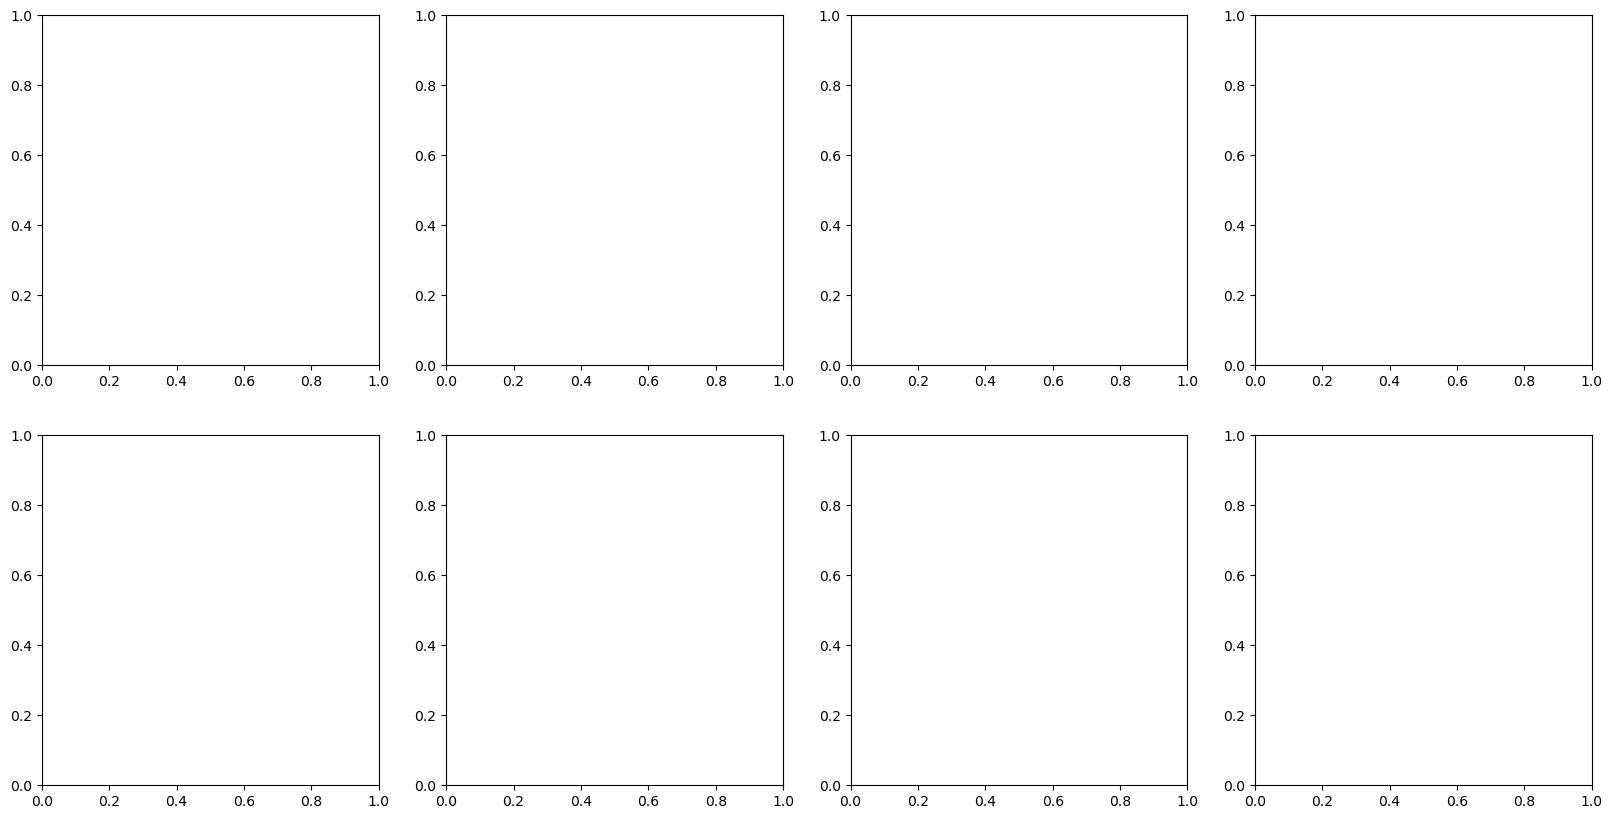

In [41]:
import matplotlib.pyplot as plt

# Assuming you have these dataframes
# first_lap_df = ...
# last_lap_df = ...

# Body points to plot
points = ['right_ankle', 'left_ankle', 'right_knee', 'left_knee', 'right_hip', 'left_hip', 'right_shoulder', 'left_shoulder']

# Create a figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Plot each point
for i, point in enumerate(points):
    # Extract x and y coordinates for the first and last lap
    x_first, y_first = first_lap_df[point + '_x'], first_lap_df[point + '_y']
    x_last, y_last = last_lap_df[point + '_x'], last_lap_df[point + '_y']

    # Plot for the first lap
    axes[i].scatter(x_first, y_first, color='blue', label='First Lap')
    
    # Plot for the last lap
    axes[i].scatter(x_last, y_last, color='red', label='Last Lap')

    # Setting labels and title
    axes[i].set_xlabel('X Position')
    axes[i].set_ylabel('Y Position')
    axes[i].set_title(f'{point.capitalize()} Position')

    # Adding legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import os
import pandas as pd

# Directory containing the CSV files
directory = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_5.1_Results'

# Function to process data (if needed)
def process_data(df):
    # Example: normalize, handle missing values, etc.
    # Modify this function according to your data processing needs
    return df

# Dictionary to store DataFrames
dataframes5 = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct file path
        file_path = os.path.join(directory, filename)

        # Load CSV file
        df = pd.read_csv(file_path)

        # Process data
        df = process_data(df)

        # Store DataFrame in the dictionary
        dataframes5[filename] = df

# Now, 'dataframes' dictionary contains all your DataFrames
# You can access each DataFrame using its filename as the key


In [ ]:
print(dataframes5)

In [73]:
import os
import pandas as pd

# Directory containing the CSV files
directory = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_2.1_Results'

# Function to process data (if needed)
def process_data(df):
    # Modify this function according to your data processing needs
    return df

# Dictionary to store DataFrames
dataframes2 = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct file path
        file_path = os.path.join(directory, filename)

        try:
            # Load CSV file
            df = pd.read_csv(file_path)

            # Process data
            df = process_data(df)

            # Store DataFrame in the dictionary
            dataframes1[filename] = df
        except pd.errors.EmptyDataError:
            print(f"Skipping empty or invalid file: {filename}")
            continue

# Add code here to work with the loaded dataframes


Skipping empty or invalid file: Lizzie Bigelow_2.1_Spine_Head_Posture_Angles.csv


In [74]:
print(dataframes2)

{}


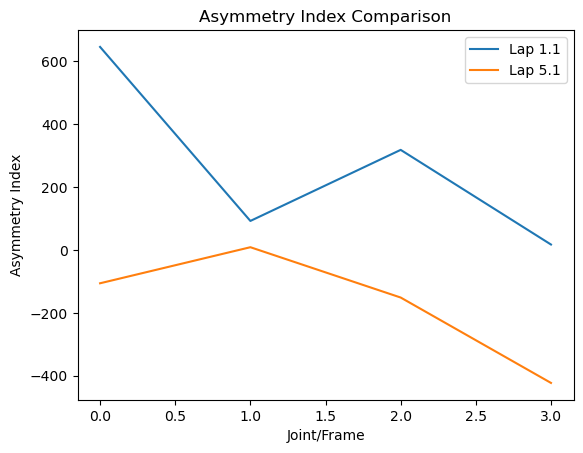

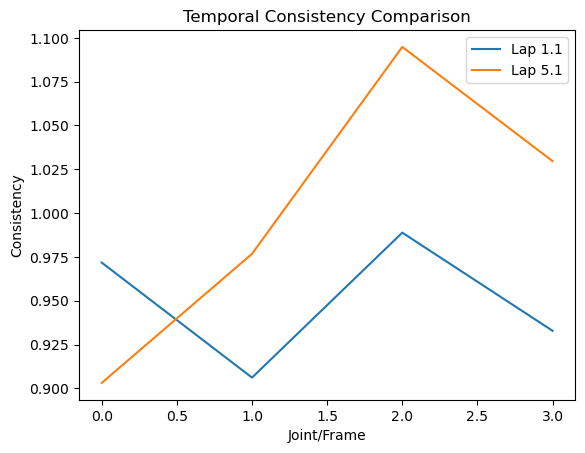

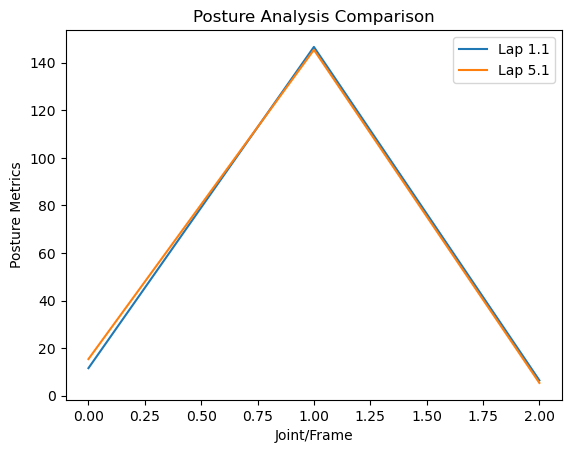

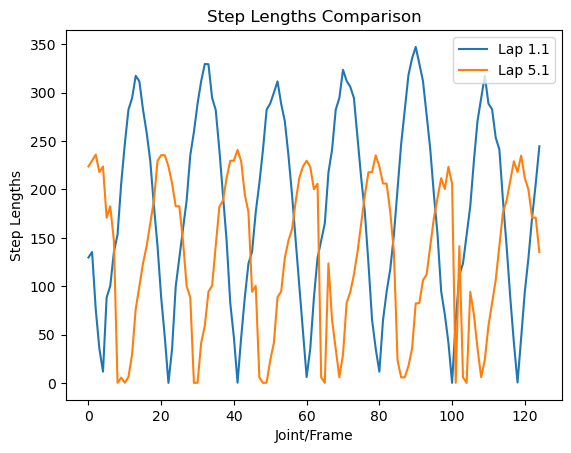

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Base directory paths for the two laps
base_dir_1 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_1.1_Results'
base_dir_5 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_5.1_Results'

# Function to load data
def load_data(base_dir, filename):
    return pd.read_csv(os.path.join(base_dir, filename))

# Load data for Lap 1.1
ai_results_1 = load_data(base_dir_1, 'Athlete_Name_Lap_1.1_ai_results.csv')
consistency_results_1 = load_data(base_dir_1, 'Athlete_Name_Lap_1.1_consistency_results.csv')
posture_analysis_1 = load_data(base_dir_1, 'Lizzie_Bigelow_Lap1.1_posture_analysis.csv')
step_lengths_1 = load_data(base_dir_1, 'step_lengths_data1.1.csv')

# Load data for Lap 5.1
ai_results_5 = load_data(base_dir_5, 'Athlete_Name_Lap_5.1_ai_results.csv')
consistency_results_5 = load_data(base_dir_5, 'Athlete_Name_Lap_5.1_consistency_results.csv')
posture_analysis_5 = load_data(base_dir_5, 'Lizzie_Bigelow_Lap5.1_posture_analysis.csv')
step_lengths_5 = load_data(base_dir_5, 'step_lengths_data5.1.csv')

# Function to plot comparisons
def plot_comparison(metric_1, metric_5, title, ylabel):
    fig, ax = plt.subplots()
    ax.plot(metric_1, label='Lap 1.1')
    ax.plot(metric_5, label='Lap 5.1')
    ax.set_xlabel('Joint/Frame')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    plt.show()

# Asymmetry Index Comparison
plot_comparison(ai_results_1['Asymmetry Index'], ai_results_5['Asymmetry Index'], 'Asymmetry Index Comparison', 'Asymmetry Index')

# Temporal Consistency Comparison
plot_comparison(consistency_results_1['Temporal Consistency'], consistency_results_5['Temporal Consistency'], 'Temporal Consistency Comparison', 'Consistency')

# Posture Analysis Comparison
plot_comparison(posture_analysis_1['Value'], posture_analysis_5['Value'], 'Posture Analysis Comparison', 'Posture Metrics')

# Step Lengths Analysis
plot_comparison(step_lengths_1['Step_Lengths'], step_lengths_5['Step_Lengths'], 'Step Lengths Comparison', 'Step Lengths')


In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Right_Knee_Angle_Data.csv' is the file name that contains the right knee angles
# Replace it with the actual file name

right_knee_angle_df1 = dataframe1['Right_Knee_Angle_Data.csv']
right_knee_angle_df5 = dataframe5['Right_Knee_Angle_Data.csv']

# Example: Comparing right knee angles over time
plt.figure(figsize=(10, 6))
plt.plot(right_knee_angle_df1['Time'], right_knee_angle_df1['Right_Knee_Angle'], label='Lap 1.1')
plt.plot(right_knee_angle_df5['Time'], right_knee_angle_df5['Right_Knee_Angle'], label='Lap 5.1')
plt.xlabel('Time')
plt.ylabel('Right Knee Angle')
plt.title('Right Knee Angle Over Time')
plt.legend()
plt.show()

# Correlation Analysis
# Make sure both dataframes have the same columns for correlation
# If necessary, align or trim them so they have the same length and corresponding columns

correlation = right_knee_angle_df1.corrwith(right_knee_angle_df5)
print(correlation)

# Plotting the correlations for a visual representation
correlation.plot(kind='bar')
plt.show()



NameError: name 'dataframe1' is not defined

In [ ]:
from scipy import stats

# Example: t-test for right knee angles between laps
t_stat, p_value = stats.ttest_ind(dataframe1['Right_Knee_Angle'], dataframe5['Right_Knee_Angle'])
print(f"T-Statistic: {t_stat}, P-value: {p_value}")

# Interpret the p-value (common threshold is 0.05)
if p_value < 0.05:
    print("Significant differences between laps.")
else:
    print("No significant difference between laps.")


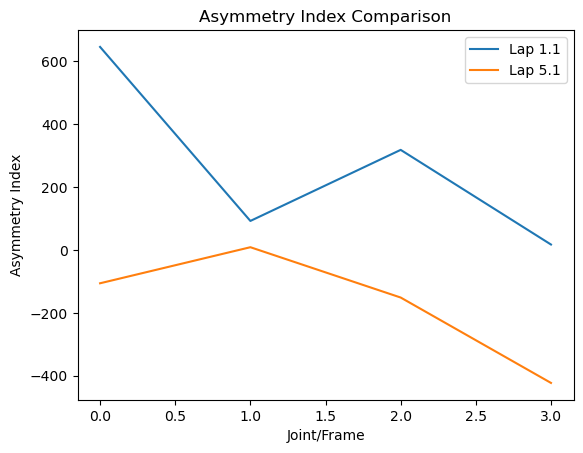

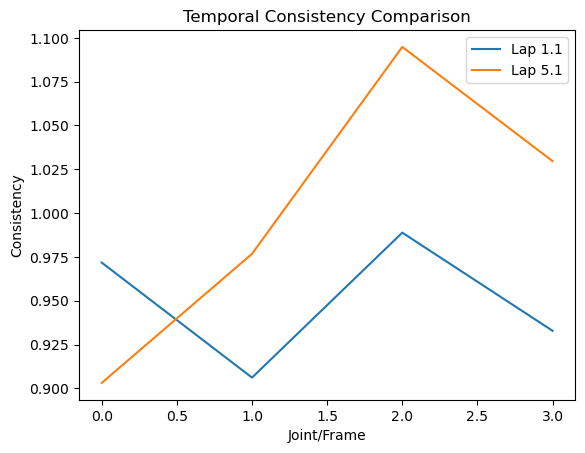

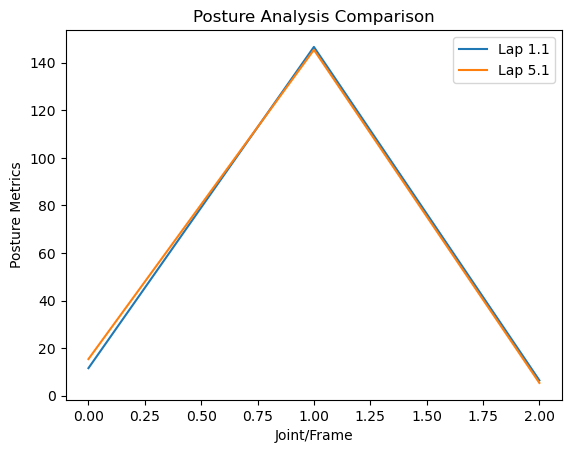

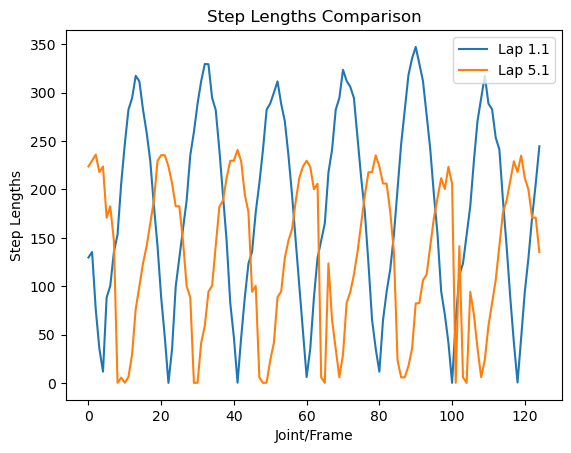

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to load data from CSV files
def load_data(base_dir, filename):
    return pd.read_csv(os.path.join(base_dir, filename))

# Base directory paths for the two laps
base_dir_1 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_1.1_Results'
base_dir_5 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_5.1_Results'

# Load data for Lap 1.1
ai_results_1 = load_data(base_dir_1, 'Athlete_Name_Lap_1.1_ai_results.csv')
consistency_results_1 = load_data(base_dir_1, 'Athlete_Name_Lap_1.1_consistency_results.csv')
posture_analysis_1 = load_data(base_dir_1, 'Lizzie_Bigelow_Lap1.1_posture_analysis.csv')
step_lengths_1 = load_data(base_dir_1, 'step_lengths_data1.1.csv')

# Load data for Lap 5.1
ai_results_5 = load_data(base_dir_5, 'Athlete_Name_Lap_5.1_ai_results.csv')
consistency_results_5 = load_data(base_dir_5, 'Athlete_Name_Lap_5.1_consistency_results.csv')
posture_analysis_5 = load_data(base_dir_5, 'Lizzie_Bigelow_Lap5.1_posture_analysis.csv')
step_lengths_5 = load_data(base_dir_5, 'step_lengths_data5.1.csv')

# Function to plot comparisons
def plot_comparison(metric_1, metric_5, title, ylabel):
    fig, ax = plt.subplots()
    ax.plot(metric_1, label='Lap 1.1')
    ax.plot(metric_5, label='Lap 5.1')
    ax.set_xlabel('Joint/Frame')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    plt.show()

# Asymmetry Index Comparison
plot_comparison(ai_results_1['Asymmetry Index'], ai_results_5['Asymmetry Index'], 'Asymmetry Index Comparison', 'Asymmetry Index')

# Temporal Consistency Comparison
plot_comparison(consistency_results_1['Temporal Consistency'], consistency_results_5['Temporal Consistency'], 'Temporal Consistency Comparison', 'Consistency')

# Posture Analysis Comparison
plot_comparison(posture_analysis_1['Value'], posture_analysis_5['Value'], 'Posture Analysis Comparison', 'Posture Metrics')

# Step Lengths Analysis
plot_comparison(step_lengths_1['Step_Lengths'], step_lengths_5['Step_Lengths'], 'Step Lengths Comparison', 'Step Lengths')


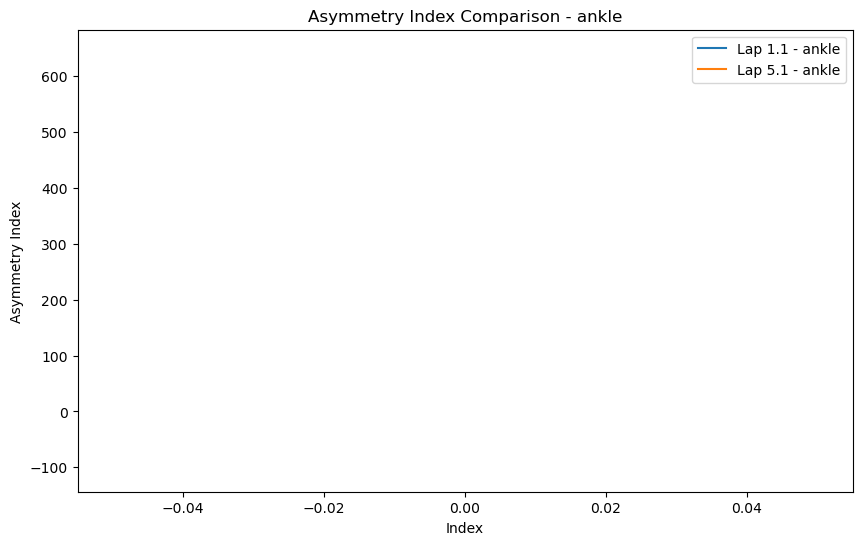

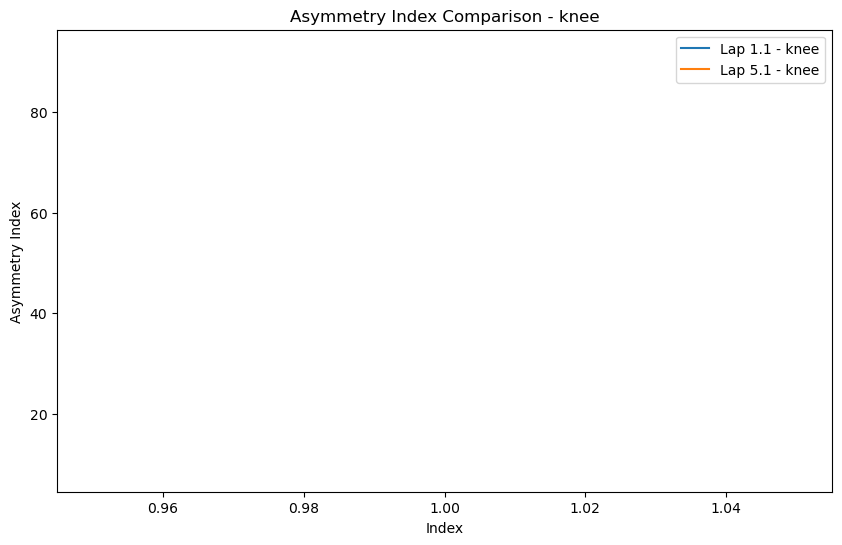

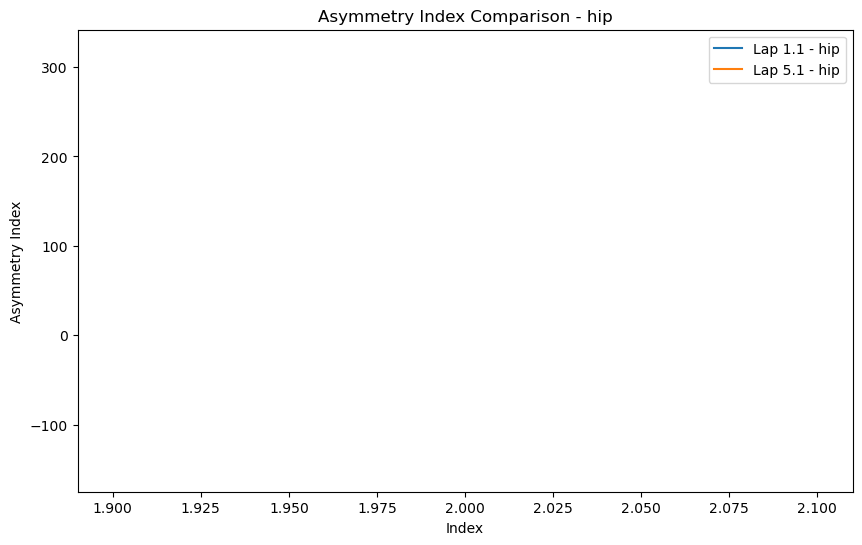

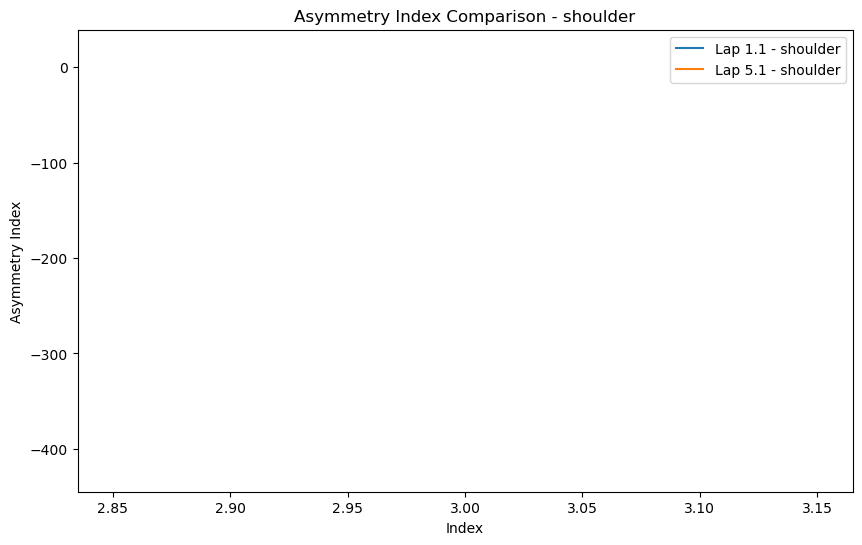

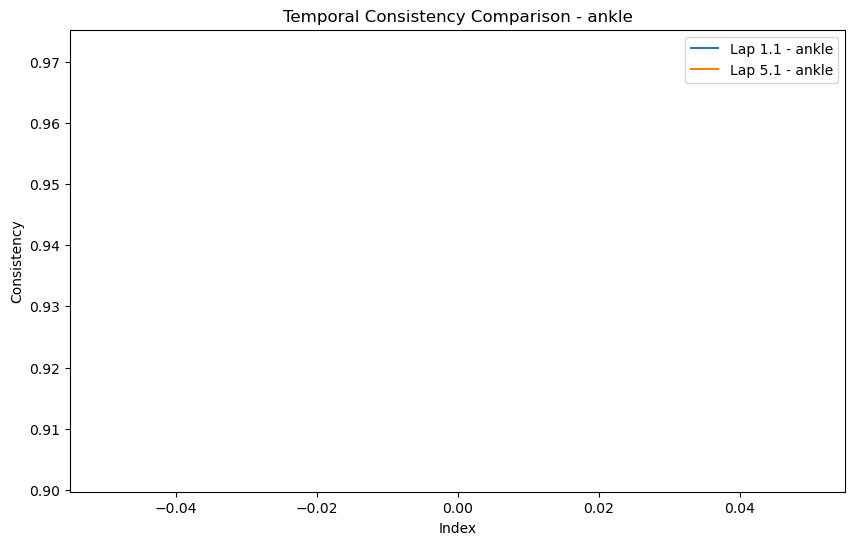

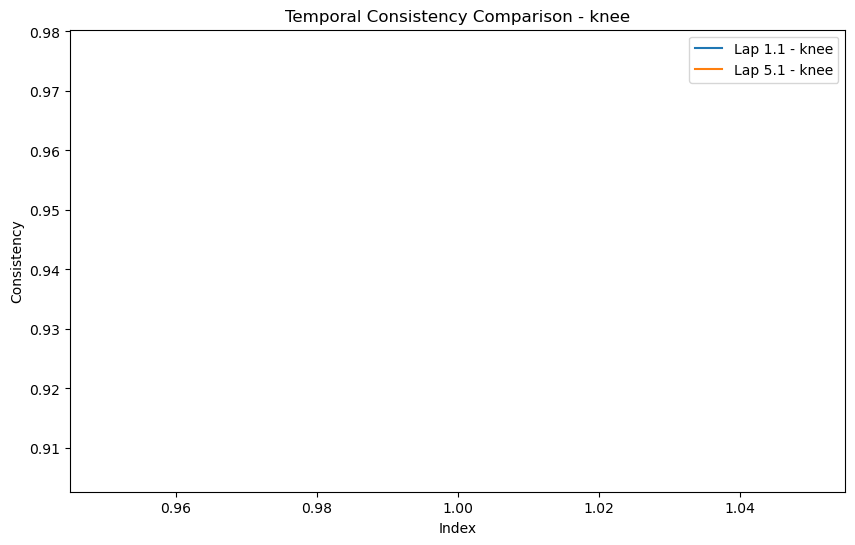

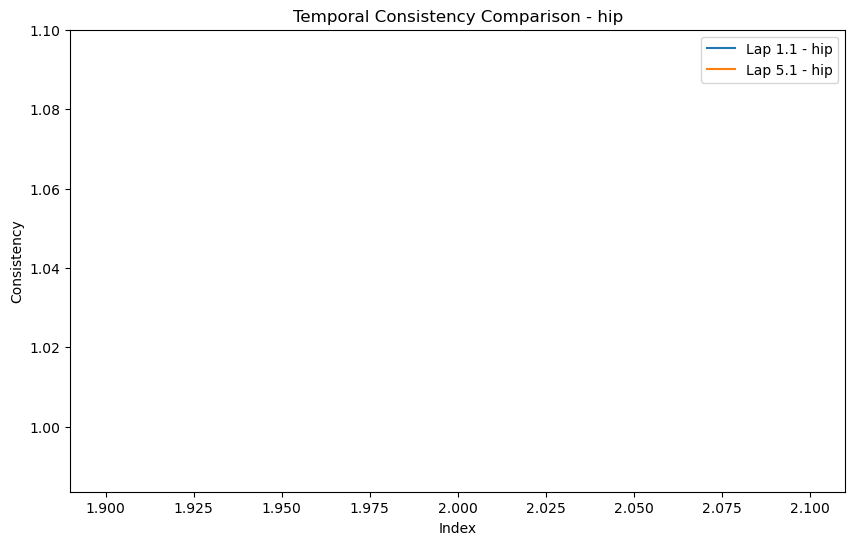

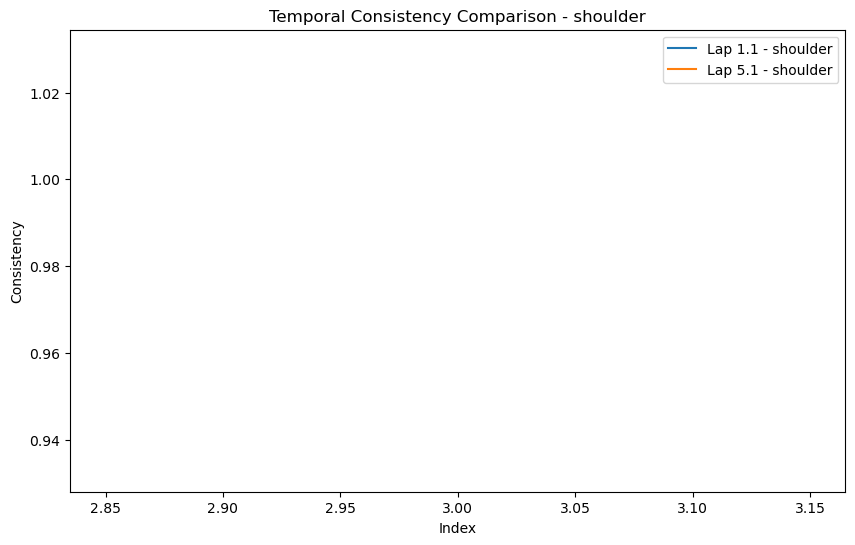

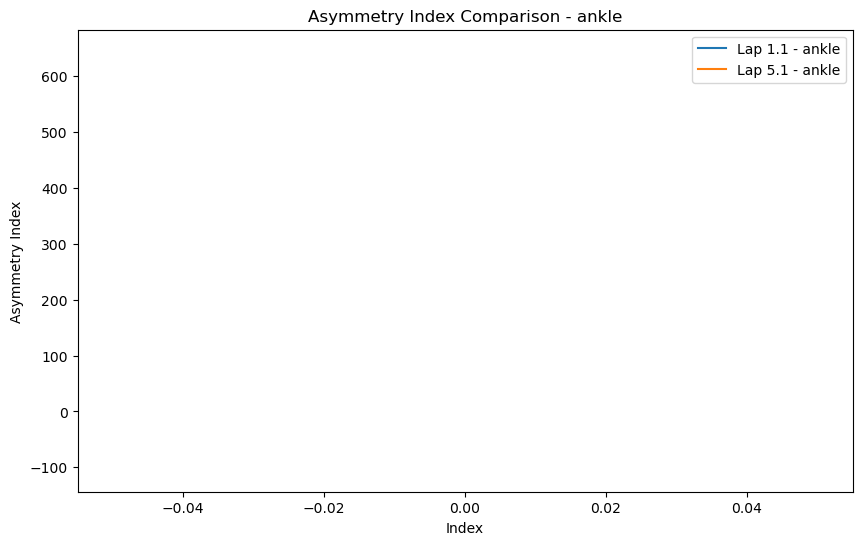

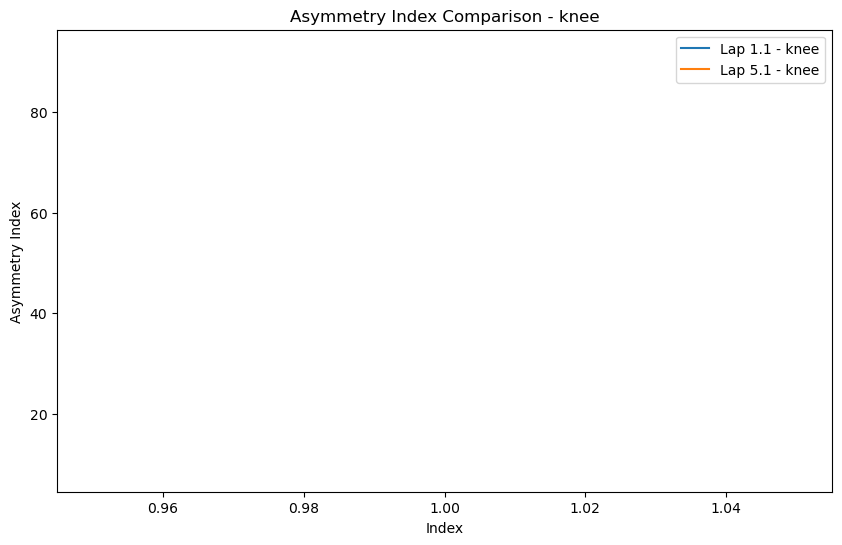

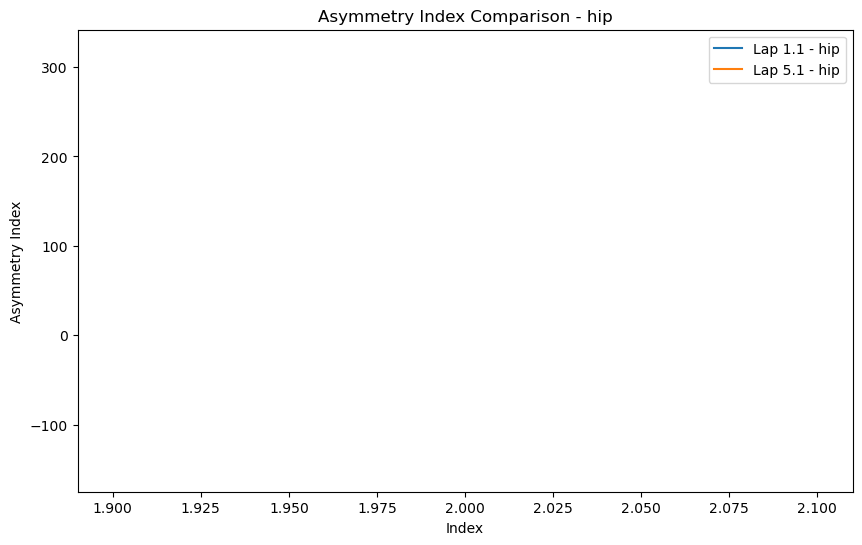

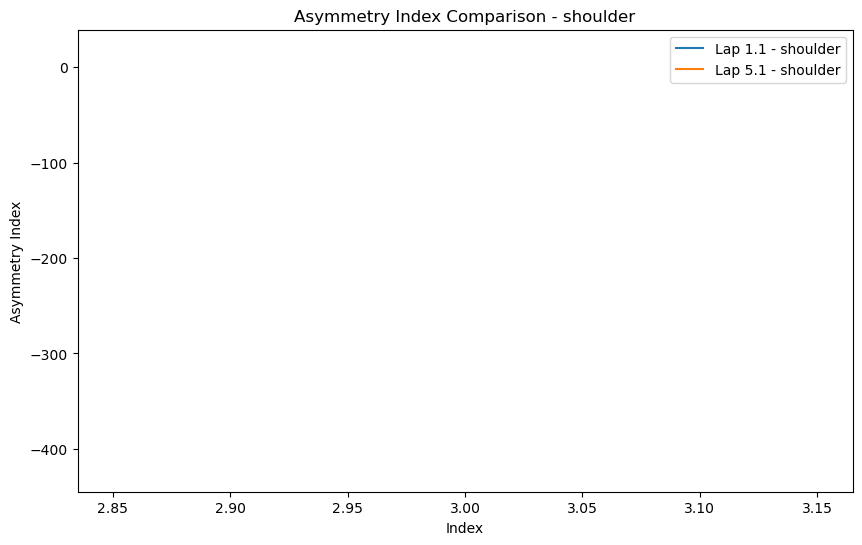

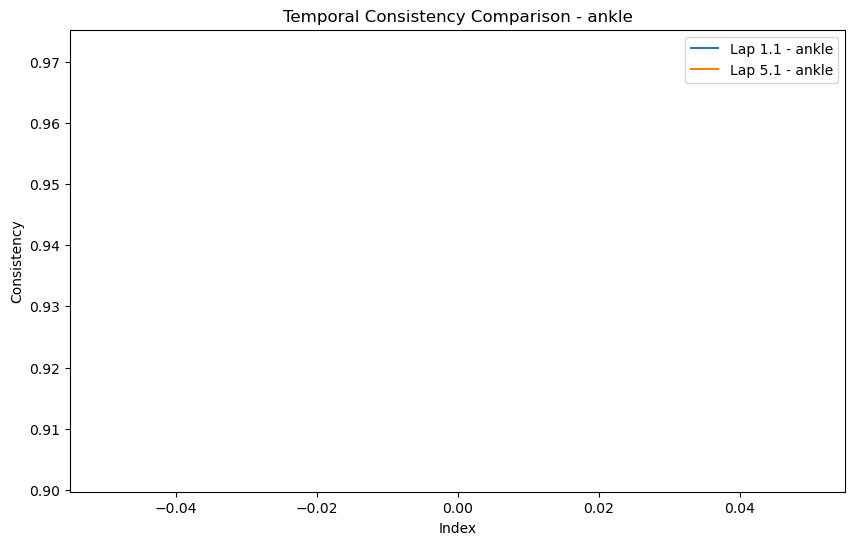

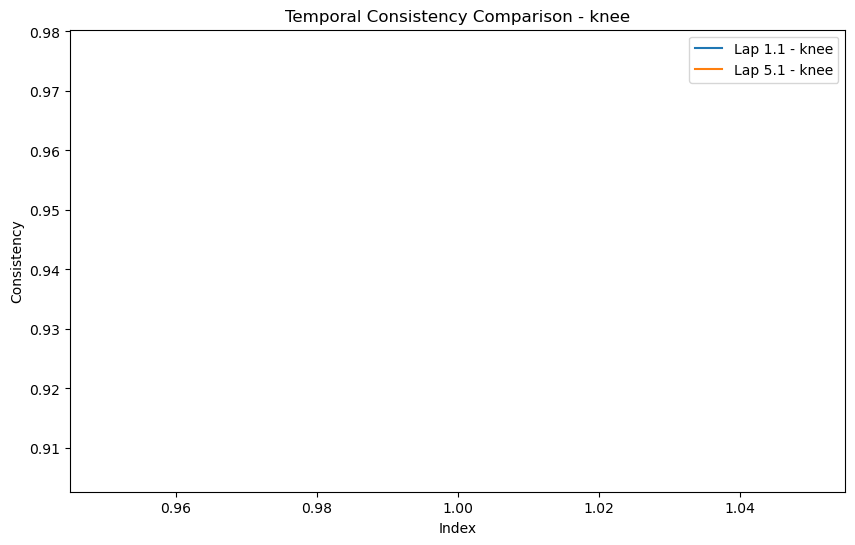

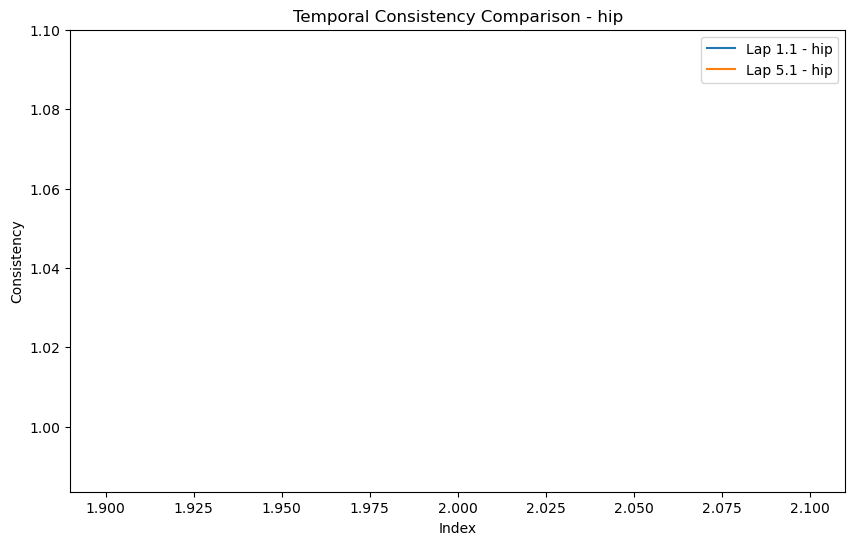

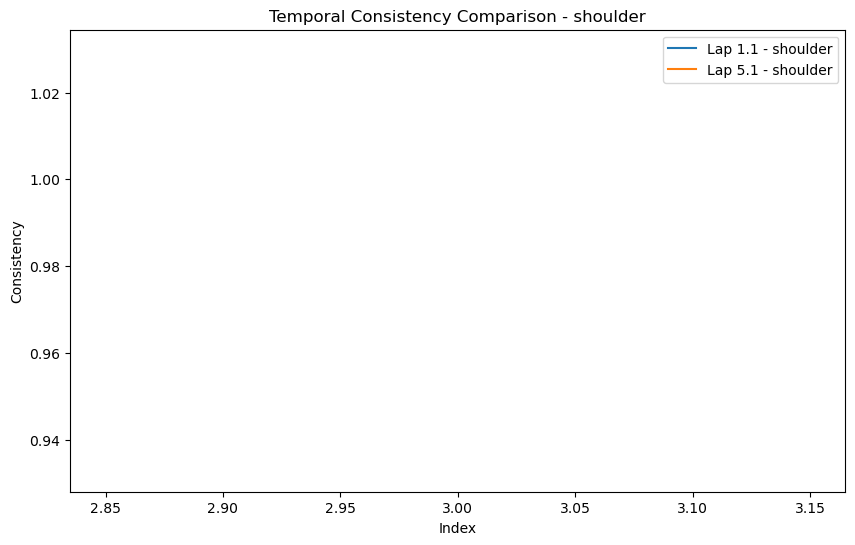

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to load data from CSV files
def load_data(base_dir, filename):
    file_path = os.path.join(base_dir, filename)
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"File not found: {file_path}")
        return None

# Function to plot comparisons for each joint
def plot_comparison_by_joint(df1, df5, metric, title, ylabel):
    if df1 is not None and df5 is not None:
        joints = df1['Joint'].unique()
        for joint in joints:
            df1_joint = df1[df1['Joint'] == joint]
            df5_joint = df5[df5['Joint'] == joint]
            
            # Check if there is data to plot
            if not df1_joint.empty and not df5_joint.empty:
                plt.figure(figsize=(10, 6))
                plt.plot(df1_joint[metric], label=f'Lap 1.1 - {joint}')
                plt.plot(df5_joint[metric], label=f'Lap 5.1 - {joint}')
                plt.xlabel('Index')
                plt.ylabel(ylabel)
                plt.title(f'{title} - {joint}')
                plt.legend()
                plt.show()
            else:
                print(f"No data to plot for joint: {joint}")
    else:
        print("Data not available for plotting")

# Assuming you have already loaded your data
# Now call the function with the dataframes
plot_comparison_by_joint(ai_results_1, ai_results_5, 'Asymmetry Index', 'Asymmetry Index Comparison', 'Asymmetry Index')
plot_comparison_by_joint(consistency_results_1, consistency_results_5, 'Temporal Consistency', 'Temporal Consistency Comparison', 'Consistency')

# Load data for Lap 1.1 and Lap 5.1
base_dir_1 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_1.1_Results'
base_dir_5 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_5.1_Results'

ai_results_1 = load_data(base_dir_1, 'Athlete_Name_Lap_1.1_ai_results.csv')
ai_results_5 = load_data(base_dir_5, 'Athlete_Name_Lap_5.1_ai_results.csv')
consistency_results_1 = load_data(base_dir_1, 'Athlete_Name_Lap_1.1_consistency_results.csv')
consistency_results_5 = load_data(base_dir_5, 'Athlete_Name_Lap_5.1_consistency_results.csv')

# Asymmetry Index Comparison by Joint
plot_comparison_by_joint(ai_results_1, ai_results_5, 'Asymmetry Index', 'Asymmetry Index Comparison', 'Asymmetry Index')

# Temporal Consistency Comparison by Joint
plot_comparison_by_joint(consistency_results_1, consistency_results_5, 'Temporal Consistency', 'Temporal Consistency Comparison', 'Consistency')


In [66]:
# Function to load joint movement data
def load_joint_data(base_dir, joint_name):
    left_joint_file = f'{joint_name}_Left_Relative_Positions.csv'
    right_joint_file = f'{joint_name}_Right_Relative_Positions.csv'
    return {
        'left': load_data(base_dir, left_joint_file),
        'right': load_data(base_dir, right_joint_file)
    }

# Load joint data for both laps
joints = ['Ankle', 'Knee', 'Hip']  # Add other joints as needed
joint_data_1 = {joint: load_joint_data(base_dir_1, joint) for joint in joints}
joint_data_5 = {joint: load_joint_data(base_dir_5, joint) for joint in joints}

# Function to plot joint movement comparison
def plot_joint_movement(joint_data_1, joint_data_5, joint_name):
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))
    axs[0].plot(joint_data_1['left']['X_Position'], label='Lap 1.1 - Left')
    axs[0].plot(joint_data_5['left']['X_Position'], label='Lap 5.1 - Left')
    axs[1].plot(joint_data_1['right']['X_Position'], label='Lap 1.1 - Right')
    axs[1].plot(joint_data_5['right']['X_Position'], label='Lap 5.1 - Right')
    for ax in axs:
        ax.set_xlabel('Time Frame')
        ax.set_ylabel('Position')
        ax.set_title(f'{joint_name} Movement Over Time')
        ax.legend()
    plt.tight_layout()
    plt.show()

# Plot joint movement comparison for each joint
for joint in joints:
    plot_joint_movement(joint_data_1[joint], joint_data_5[joint], joint)

# Add additional plots for other metrics as needed


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\A'

KeyError: 'Time'

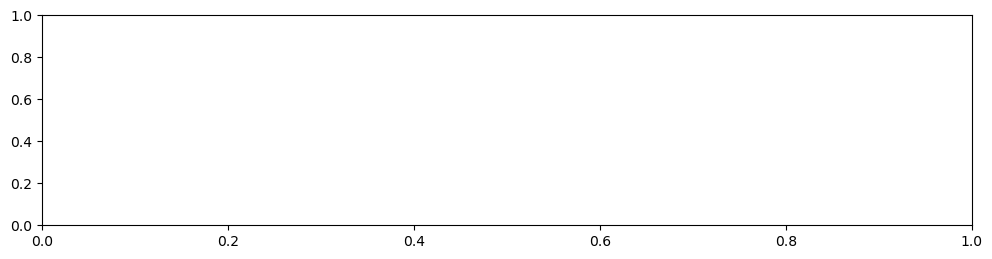

In [65]:
import matplotlib.pyplot as plt

# Assuming you have dataframes with the right knee joint positions and knee angles
# Replace 'Right_Knee_X', 'Right_Knee_Y', and 'Right_Knee_Angle' with your actual column names

# Joint Movements Analysis: Right Knee
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(dataframe1['Time'], dataframe1['Right_Knee_X'], label='Lap 1.1 - X Coordinate')
plt.plot(dataframe5['Time'], dataframe5['Right_Knee_X'], label='Lap 5.1 - X Coordinate')
plt.ylabel('X Position')
plt.title('Right Knee Movement - X Coordinate')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(dataframe1['Time'], dataframe1['Right_Knee_Y'], label='Lap 1.1 - Y Coordinate')
plt.plot(dataframe5['Time'], dataframe5['Right_Knee_Y'], label='Lap 5.1 - Y Coordinate')
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.title('Right Knee Movement - Y Coordinate')
plt.legend()
plt.tight_layout()
plt.show()

# Angle Variations Analysis: Knee Angle
plt.figure(figsize=(10, 6))
plt.plot(dataframe1['Time'], dataframe1['Right_Knee_Angle'], label='Lap 1.1')
plt.plot(dataframe5['Time'], dataframe5['Right_Knee_Angle'], label='Lap 5.1')
plt.xlabel('Time')
plt.ylabel('Knee Angle')
plt.title('Knee Angle Variations Over Time')
plt.legend()
plt.show()


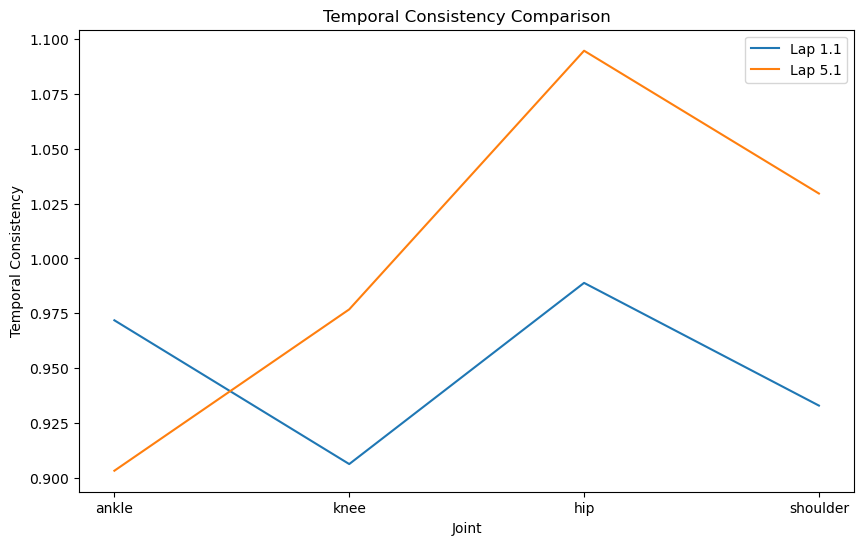

KeyError: 0

<Figure size 1000x600 with 0 Axes>

In [64]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def load_data(base_dir, filenames):
    return {filename: pd.read_csv(os.path.join(base_dir, filename)) for filename in filenames}

# Directory paths
base_dir_1 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_1.1_Results'
base_dir_5 = r'C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_5.1_Results'

# Filenames for each lap
filenames_1 = [
    'Athlete_Name_Lap_1.1_ai_results.csv',
    'Athlete_Name_Lap_1.1_consistency_results.csv',
    'Lizzie Bigelow_1.1_Ankle_Left_Relative_Positions.csv',
    # Add other filenames for Lap 1.1 as needed
]

filenames_5 = [
    'Athlete_Name_Lap_5.1_ai_results.csv',
    'Athlete_Name_Lap_5.1_consistency_results.csv',
    'Lizzie Bigelow_5.1_Ankle_Left_Relative_Positions.csv',
    # Add other filenames for Lap 5.1 as needed
]

# Load data
dataframe1 = load_data(base_dir_1, filenames_1)
dataframe5 = load_data(base_dir_5, filenames_5)

# Function to plot comparison between two laps
def plot_comparison(df1, df5, metric, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df1['Joint'], df1[metric], label='Lap 1.1')
    plt.plot(df5['Joint'], df5[metric], label='Lap 5.1')
    plt.xlabel('Joint')
    plt.ylabel(metric)
    plt.title(title)
    plt.legend()
    plt.show()

# Temporal Consistency Comparison
plot_comparison(
    dataframe1['Athlete_Name_Lap_1.1_consistency_results.csv'], 
    dataframe5['Athlete_Name_Lap_5.1_consistency_results.csv'], 
    'Temporal Consistency', 
    'Temporal Consistency Comparison'
)

# Function to plot relative positions
def plot_relative_positions(df1, df5, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df1[0], df1[1], label='Lap 1.1', alpha=0.7)
    plt.scatter(df5[0], df5[1], label='Lap 5.1', alpha=0.7)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(title)
    plt.legend()
    plt.show()

# Left Ankle Relative Positions Comparison
plot_relative_positions(
    dataframe1['Lizzie Bigelow_1.1_Ankle_Left_Relative_Positions.csv'],
    dataframe5['Lizzie Bigelow_5.1_Ankle_Left_Relative_Positions.csv'],
    'Left Ankle Relative Positions Comparison'
)

# Step Lengths Comparison Over Time
plt.figure(figsize=(12, 6))
plt.plot(dataframe1['step_lengths_data1.1.csv']['Time_Frames'], dataframe1['step_lengths_data1.1.csv']['Step_Lengths'], label='Lap 1.1')
plt.plot(dataframe5['step_lengths_data1.1.csv']['Time_Frames'], dataframe5['step_lengths_data1.1.csv']['Step_Lengths'], label='Lap 5.1')
plt.xlabel('Time Frame')
plt.ylabel('Step Lengths')
plt.title('Step Lengths Comparison Over Time')
plt.legend()
plt.show()



In [55]:
# Print the first few rows of the DataFrame to understand its structure
print(dataframe1['Athlete_Name_Lap_1.1_ai_results.csv'].head())


      Joint  Asymmetry Index
0     ankle       645.632470
1      knee        92.208978
2       hip       318.242053
3  shoulder        17.192263


In [60]:
# Print the first few rows of the DataFrame for inspection
print(dataframe1['Athlete_Name_Lap_1.1_consistency_results.csv'].head())
print(dataframe5['Athlete_Name_Lap_5.1_consistency_results.csv'].head())


      Joint  Temporal Consistency
0     ankle              0.971778
1      knee              0.906171
2       hip              0.988854
3  shoulder              0.932853
      Joint  Temporal Consistency
0     ankle              0.903132
1      knee              0.976767
2       hip              1.094798
3  shoulder              1.029631


In [83]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from scipy.stats import friedmanchisquare

# Temporal Consistency
tc_lap1 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\Athlete_Name_Lap_1.1_consistency_results.csv')
tc_lap3 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\Athlete_Name_Lap_3.1_consistency_results.csv')
tc_lap5 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\Athlete_Name_Lap_5.1_consistency_results.csv')

# Cyclical AI
cyc_ai_lap1 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\Lizzie Bigelow_1.1_left_knee_vs_right_knee_Cyclical_AI.csv')
cyc_ai_lap3 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\Lizzie Bigelow_3.1_left_knee_vs_right_knee_Cyclical_AI.csv')
cyc_ai_lap5 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\Lizzie Bigelow_5.1_left_knee_vs_right_knee_Cyclical_AI.csv')

# Posture Analysis
posture_lap1 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\Lizzie_Bigelow_Lap1.1_posture_analysis.csv')
posture_lap3 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\Lizzie Bigelow_Lap3.1_posture_analysis.csv')
posture_lap5 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\Lizzie_Bigelow_Lap5.1_posture_analysis.csv')

# Stride Length
stride_lap1 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\step_lengths_data1.1.csv')
stride_lap3 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\step_lengths_data3.1.csv')
stride_lap5 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\step_lengths_data5.1.csv')

# Knee Relative Positions
knee_left_lap1 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\Lizzie Bigelow_1.1_Knee_Left_Relative_Positions.csv')
knee_right_lap1 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\Lizzie Bigelow_1.1_Knee_Right_Relative_Positions.csv')
knee_left_lap3 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\Lizzie Bigelow_3.1_Knee_Left_Relative_Positions.csv')
knee_right_lap3 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\Lizzie Bigelow_3.1_Knee_Right_Relative_Positions.csv')
knee_left_lap5 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\Lizzie Bigelow_5.1_Knee_Left_Relative_Positions.csv')
knee_right_lap5 = pd.read_csv('C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\Lizzie Bigelow_5.1_Knee_Right_Relative_Positions.csv')

# Ankle Left Relative Positions
ankle_left_lap1_path = 'C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\Lizzie Bigelow_1.1_Ankle_Left_Relative_Positions.csv'
ankle_left_lap3_path = 'C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\Lizzie Bigelow_3.1_Ankle_Left_Relative_Positions.csv'
ankle_left_lap5_path = 'C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\Lizzie Bigelow_5.1_Ankle_Left_Relative_Positions.csv'

# Ankle Right Relative Positions
ankle_right_lap1_path = 'C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_1.1_Results\\Lizzie Bigelow_1.1_Ankle_Right_Relative_Positions.csv'
ankle_right_lap3_path = 'C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_3.1_Results\\Lizzie Bigelow_3.1_Ankle_Right_Relative_Positions.csv'
ankle_right_lap5_path = 'C:\\Users\\dgriff06\\AthleteAnalysis\\Lizzie_Bigelow_5.1_Results\\Lizzie Bigelow_5.1_Ankle_Right_Relative_Positions.csv'


# Now we will prepare the data for analysis.
# We will pivot the data so that each row represents a single measurement of a lap for a single athlete.
# This is a necessary step to perform Repeated Measures ANOVA.

# For the sake of the example, let's assume all the data from different laps is from the same athlete.
# We will create a unique identifier for the athlete.
athlete_id = 'Lizzie Bigelow'

# As an example, let's prepare the Temporal Consistency data.
# We will concatenate the data from different laps and add a 'Lap' identifier.
tc_data = pd.concat([
    tc_lap1.assign(Lap='1.1'),
    tc_lap3.assign(Lap='3.1'),
    tc_lap5.assign(Lap='5.1')
])

# Now the data is structured for Repeated Measures ANOVA.
# We will run an ANOVA for each joint type, for example for the 'ankle' joint.
tc_ankle_data = tc_data[tc_data['Joint'] == 'ankle'].copy()
tc_ankle_data['Subject'] = athlete_id  # Adding a subject column

aovrm = AnovaRM(tc_ankle_data, 'Temporal Consistency', 'Subject', within=['Lap'])
res = aovrm.fit()
print(res.summary())

             Anova
    F Value Num DF Den DF Pr > F
--------------------------------
Lap  0.0000 2.0000 0.0000    nan



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:594: RuntimeWarning: divide by zero encountered in scalar divide
  mse = ssr / df_resid


In [84]:
print(tc_lap1.describe())
print(tc_lap3.describe())
print(tc_lap5.describe())
print("Number of observations in Lap 1.1:", tc_lap1.shape[0])
print("Number of observations in Lap 3.1:", tc_lap3.shape[0])
print("Number of observations in Lap 5.1:", tc_lap5.shape[0])
print(tc_lap1.isnull().sum())
print(tc_lap3.isnull().sum())
print(tc_lap5.isnull().sum())


       Temporal Consistency
count              4.000000
mean               0.949914
std                0.037411
min                0.906171
25%                0.926182
50%                0.952315
75%                0.976047
max                0.988854
       Temporal Consistency
count              4.000000
mean               0.985602
std                0.016393
min                0.961728
25%                0.981464
50%                0.991935
75%                0.996073
max                0.996812
       Temporal Consistency
count              4.000000
mean               1.001082
std                0.081206
min                0.903132
25%                0.958358
50%                1.003199
75%                1.045922
max                1.094798
Number of observations in Lap 1.1: 4
Number of observations in Lap 3.1: 4
Number of observations in Lap 5.1: 4
Joint                   0
Temporal Consistency    0
dtype: int64
Joint                   0
Temporal Consistency    0
dtype: int64
Joi

In [85]:
from scipy.stats import levene
stat, p = levene(tc_lap1['Temporal Consistency'], tc_lap3['Temporal Consistency'], tc_lap5['Temporal Consistency'])
print('Levene’s Test Statistic:', stat, 'P-Value:', p)


Levene’s Test Statistic: 3.949777600919261 P-Value: 0.05870195418014354


In [89]:
# Extracting 'Temporal Consistency' values for the 'ankle' joint
tc_ankle_lap1 = tc_lap1[tc_lap1['Joint'] == 'ankle']['Temporal Consistency']
tc_ankle_lap3 = tc_lap3[tc_lap3['Joint'] == 'ankle']['Temporal Consistency']
tc_ankle_lap5 = tc_lap5[tc_lap5['Joint'] == 'ankle']['Temporal Consistency']

stat, p = friedmanchisquare(tc_ankle_lap1, tc_ankle_lap3, tc_ankle_lap5)
print('Friedman Test for Temporal Consistency (ankle): Stat=', stat, 'P-Value=', p)




Friedman Test for Temporal Consistency (ankle): Stat= 2.0 P-Value= 0.36787944117144245


In [90]:
# Assuming 'Cyclical Asymmetry Index' is the column to be tested
stat, p = friedmanchisquare(cyc_ai_lap1['Cyclical Asymmetry Index'], cyc_ai_lap3['Cyclical Asymmetry Index'], cyc_ai_lap5['Cyclical Asymmetry Index'])
print('Friedman Test for Cyclical AI: Stat=', stat, 'P-Value=', p)


Friedman Test for Cyclical AI: Stat= 2.0 P-Value= 0.36787944117144245


In [95]:
# Filter the dataframes for a specific metric, e.g., 'Forward Lean Angle'
posture_lap1_specific = posture_lap1[posture_lap1['Metric'] == 'Forward Lean Angle']['Value']
posture_lap3_specific = posture_lap3[posture_lap3['Metric'] == 'Forward Lean Angle']['Value']
posture_lap5_specific = posture_lap5[posture_lap5['Metric'] == 'Forward Lean Angle']['Value']

# Perform the Friedman test for the specific metric
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(posture_lap1_specific, posture_lap3_specific, posture_lap5_specific)
print('Friedman Test for Forward Lean Angle: Stat=', stat, 'P-Value=', p)



Friedman Test for Forward Lean Angle: Stat= 2.0 P-Value= 0.36787944117144245


In [98]:
# Determine the minimum number of observations in the three datasets
min_length = min(len(stride_lap1), len(stride_lap3), len(stride_lap5))

# Select the first 'min_length' observations from each dataset
stride_lap1_subset = stride_lap1['Step_Lengths'].iloc[:min_length]
stride_lap3_subset = stride_lap3['Step_Lengths'].iloc[:min_length]
stride_lap5_subset = stride_lap5['Step_Lengths'].iloc[:min_length]

# Perform the Friedman test on the subsets
stat, p = friedmanchisquare(stride_lap1_subset, stride_lap3_subset, stride_lap5_subset)
print('Friedman Test for Stride Length: Stat=', stat, 'P-Value=', p)



Friedman Test for Stride Length: Stat= 3.47199999999998 P-Value= 0.17622388825676288


In [96]:
# Print the column names of the stride length dataframes
print("Columns in stride_lap1:", stride_lap1.columns)
print("Columns in stride_lap3:", stride_lap3.columns)
print("Columns in stride_lap5:", stride_lap5.columns)



Columns in stride_lap1: Index(['Time_Frames', 'Step_Lengths'], dtype='object')
Columns in stride_lap3: Index(['Time_Frames', 'Step_Lengths'], dtype='object')
Columns in stride_lap5: Index(['Time_Frames', 'Step_Lengths'], dtype='object')
